In [1]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

from finta import TA
import yfinance as yf

from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

E:\Users\asus\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
df = pd.read_csv('.\Features.csv')
features = ['DATE','A_CLOSE']
df = df[features]
df.head()

DATE    A_CLOSE
0  2013/10/1  16.047501
1  2013/10/2  16.025499
2  2013/10/3  15.738000
3  2013/10/4  15.952000
4  2013/10/7  15.501500

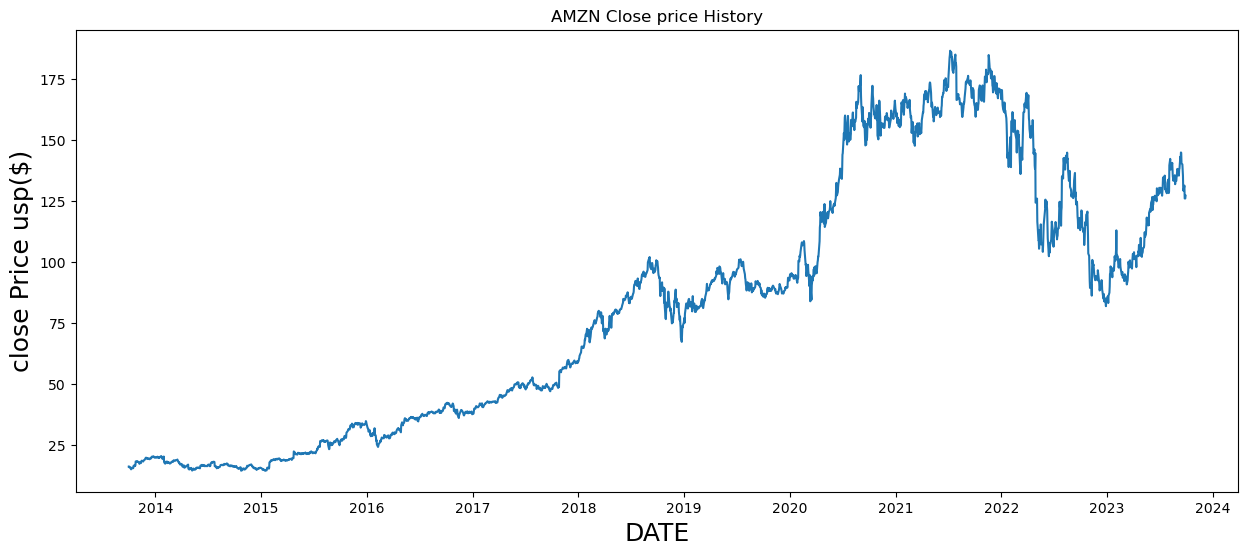

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

plt.figure(figsize=(15,6))
plt.title('AMZN Close price History')
plt.plot(df.index,df['A_CLOSE'])
plt.xlabel('DATE',fontsize=18)
plt.ylabel('close Price usp($)',fontsize=18)
plt.show()

In [4]:
diff_df = df.diff()
diff_df.dropna(inplace=True)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(diff_df)
scaled_df[0:5]

array([[0.51888313],
       [0.51209448],
       [0.5249176 ],
       [0.50792662],
       [0.51075206]])

In [6]:
scaled_df = pd.DataFrame(data = scaled_df,
                         index = diff_df.index,
                         columns = ['A_CLOSE'])

In [8]:
clms = scaled_df.columns
n = 19
for i in clms:
    j = 0
    while j < n:
        scaled_df[str(i)+'_'+str(j)] = scaled_df. loc[:, str(i)].shift(j+1)
        j = j + 1
print(scaled_df.shape)
scaled_df.head(5)

(2516, 20)


A_CLOSE  A_CLOSE_0  A_CLOSE_1  A_CLOSE_2  A_CLOSE_3  A_CLOSE_4  \
DATE                                                                          
2013-10-02  0.518883        NaN        NaN        NaN        NaN        NaN   
2013-10-03  0.512094   0.518883        NaN        NaN        NaN        NaN   
2013-10-04  0.524918   0.512094   0.518883        NaN        NaN        NaN   
2013-10-07  0.507927   0.524918   0.512094   0.518883        NaN        NaN   
2013-10-08  0.510752   0.507927   0.524918   0.512094   0.518883        NaN   

            A_CLOSE_5  A_CLOSE_6  A_CLOSE_7  A_CLOSE_8  A_CLOSE_9  A_CLOSE_10  \
DATE                                                                            
2013-10-02        NaN        NaN        NaN        NaN        NaN         NaN   
2013-10-03        NaN        NaN        NaN        NaN        NaN         NaN   
2013-10-04        NaN        NaN        NaN        NaN        NaN         NaN   
2013-10-07        NaN        NaN        NaN        NaN        NaN         NaN   
2013-10-08        NaN        NaN        NaN        NaN        NaN         NaN   

            A_CLOSE_11  A_CLOSE_12  A_CLOSE_13  A_CLOSE_14  A_CLOSE_15  \
DATE                                                                     
2013-10-02         NaN         NaN         NaN         NaN         NaN   
2013-10-03         NaN         NaN         NaN         NaN         NaN   
2013-10-04         NaN         NaN         NaN         NaN         NaN   
2013-10-07         NaN         NaN         NaN         NaN         NaN   
2013-10-08         NaN         NaN         NaN         NaN         NaN   

            A_CLOSE_16  A_CLOSE_17  A_CLOSE_18  
DATE                                            
2013-10-02         NaN         NaN         NaN  
2013-10-03         NaN         NaN         NaN  
2013-10-04         NaN         NaN         NaN  
2013-10-07         NaN         NaN         NaN  
2013-10-08         NaN         NaN         NaN

In [9]:
scaled_df['target'] = scaled_df.A_CLOSE.shift(-5)
scaled_df.dropna(inplace=True)
scaled_df.head(5)

A_CLOSE  A_CLOSE_0  A_CLOSE_1  A_CLOSE_2  A_CLOSE_3  A_CLOSE_4  \
DATE                                                                          
2013-10-29  0.525250   0.512759   0.559309   0.526413   0.512056   0.527244   
2013-10-30  0.517375   0.525250   0.512759   0.559309   0.526413   0.512056   
2013-10-31  0.523217   0.517375   0.525250   0.512759   0.559309   0.526413   
2013-11-01  0.513015   0.523217   0.517375   0.525250   0.512759   0.559309   
2013-11-04  0.519113   0.513015   0.523217   0.517375   0.525250   0.512759   

            A_CLOSE_5  A_CLOSE_6  A_CLOSE_7  A_CLOSE_8  ...  A_CLOSE_10  \
DATE                                                    ...               
2013-10-29   0.516262   0.542663   0.519804   0.524675  ...    0.519203   
2013-10-30   0.527244   0.516262   0.542663   0.519804  ...    0.513948   
2013-10-31   0.512056   0.527244   0.516262   0.542663  ...    0.524675   
2013-11-01   0.526413   0.512056   0.527244   0.516262  ...    0.519804   
2013-11-04   0.559309   0.526413   0.512056   0.527244  ...    0.542663   

            A_CLOSE_11  A_CLOSE_12  A_CLOSE_13  A_CLOSE_14  A_CLOSE_15  \
DATE                                                                     
2013-10-29    0.526759    0.528318    0.513053    0.510752    0.507927   
2013-10-30    0.519203    0.526759    0.528318    0.513053    0.510752   
2013-10-31    0.513948    0.519203    0.526759    0.528318    0.513053   
2013-11-01    0.524675    0.513948    0.519203    0.526759    0.528318   
2013-11-04    0.519804    0.524675    0.513948    0.519203    0.526759   

            A_CLOSE_16  A_CLOSE_17  A_CLOSE_18    target  
DATE                                                      
2013-10-29    0.524918    0.512094    0.518883  0.519637  
2013-10-30    0.507927    0.524918    0.512094  0.515981  
2013-10-31    0.510752    0.507927    0.524918  0.503311  
2013-11-01    0.513053    0.510752    0.507927  0.528075  
2013-11-04    0.528318    0.513053    0.510752  0.524649  

[5 rows x 21 columns]

In [10]:
def train_test_split(data, perc):
    data = data.values
    n=int(len(data)*(1-perc))
    return data[:n], data[n:]
train_validation,test = train_test_split(scaled_df, 0.2)

In [11]:
train_x_cv = train_validation[:,:-1]
train_y_cv = train_validation[:,-1]
print(train_x_cv.shape,train_y_cv.shape)

(1993, 20) (1993,)


In [12]:
test_x_cv = test[:,:-1]
test_y_cv = test[:,-1]
print(test_x_cv.shape,test_y_cv.shape)

(499, 20) (499,)


In [16]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import math

scaled_df['target_b1_noDiff'] = df.A_CLOSE.shift(-4)
target_b1_noDiff = scaled_df[1993:]['target_b1_noDiff']
scaled_df['close_noDiff'] = df.A_CLOSE
close_noDiff = scaled_df[1993:]['close_noDiff']

def mape(actual, pred):
    actual,pred =np.array(actual),np.array(pred)
    mape = np.mean(np.abs((actual-pred)/actual))
    return mape

def validate(train_x,train_y,test_x,test_y):
    inverseDiff_predictions =[]
    inverse_predictions =[]
    inverse_test_y =[]
    predictions =[]
    history_x = [x for x in train_x]
    history_y = [y for y in train_y]
    
    X = np.array(history_x)
    y = np.array(history_y)
    model = XGBRegressor(objective='reg:squarederror', gamma=0.3,learning_rate=0.005, n_estimators=250, max_depth=5)
    model.fit(X,y*10)
        
    min_value = float(diff_maxmin.iloc[0]['min'])
    max_min = float(diff_maxmin.iloc[0]['max'])-min_value
    for i in range(len(test_x)):
        X_test_i = test_x[i,:]
        val =np.array(X_test_i).reshape(1,-1)
        pred = model.predict(val)/10
        inverseDiff_predictions.append((pred[0] * max_min) + min_value) 
        inverse_test_y.append ((test_y[i] * max_min) + min_value + target_b1_noDiff[i])
        predictions.append(pred[0]) 
            

    for i in range(len(test_x)-4):
        j = 0
        temp = close_noDiff[i+4]
        while j < 5:
            temp = temp + inverseDiff_predictions[i+j]
            j = j + 1
        inverse_predictions.append(temp) 

    mse = mean_squared_error(inverse_test_y[4:],inverse_predictions)
    MAPE = mape(inverse_test_y[4:],inverse_predictions)
    return mse,MAPE,inverse_test_y[4:],inverse_predictions

In [ ]:
import time
start_time = time.time()
mse, MAPE , y , pred = validate(train_x_cv,train_y_cv,test_x_cv,test_y_cv)
end_time = time.time()
rmse = mean_squared_error(y,pred, squared=False)
print("RMSE: ",rmse)
print("MSE: ",mse)
print("MAPE: ", MAPE)
print(end_time - start_time)

In [18]:
pred = np.array(pred)

test_pred = np.c_[y,pred]
df_TP = pd.DataFrame(test_pred, columns = ['Target','Pred'])

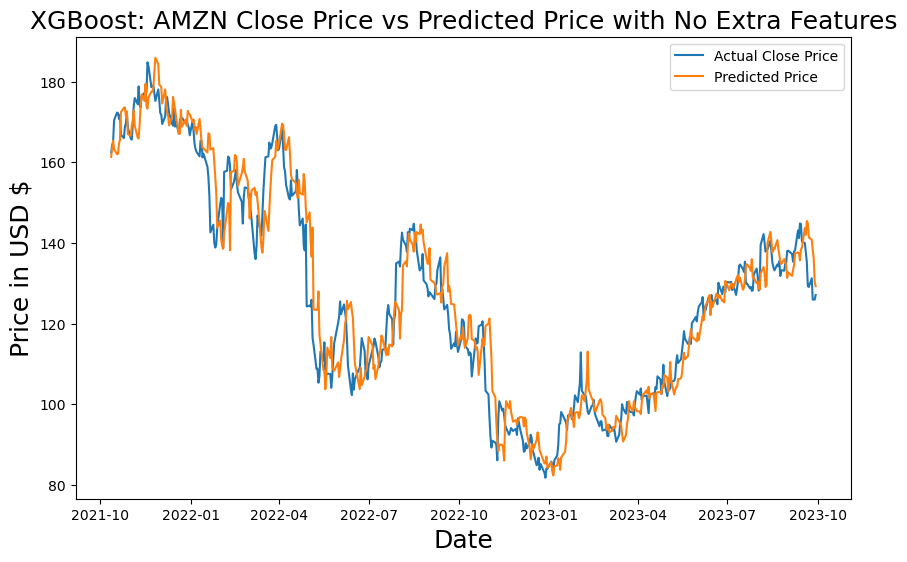

In [20]:
plt.figure(figsize=(10,6))
plt.title('XGBoost: AMZN Close Price vs Predicted Price with No Extra Features',fontsize = 18)
plt.plot(df.iloc[df.shape[0]-pred.size:].index,df_TP['Target'], label= "Actual Close Price")
plt.plot(df.iloc[df.shape[0]-pred.size:].index,df_TP['Pred'], label="Predicted Price")
plt.xlabel('Date',fontsize = 18)
plt.legend()
plt.ylabel('Price in USD $',fontsize = 18)
plt.savefig('XGBoost_noExtraFeatures.jpg')